# Chapter 3.7: How is the infection rate affected by public activity?

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;From the very beggining of this internship, one of the most pressing questions was prompted with was how has recent public activity affected the COVID 19 infection rate? Have the recent protests caused a spike in infections? Are government stay at home ordes actually slowing down the virus? Can counties open up buisnesses without endangering public health? Investigating these questions requires a method of inspecting county infection rate. Using the graphs I produced in chapter 3.6, and public records of COVID 19 updates for Miami-Dade and LA county, I searched for a corelation between public activity and changes in infection rate.   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Defining what constitutes as causation, rather than correlation, is important in determining whether or not these public events cause spikes or declines in infection rate. On average, COVID 19 has a five day incubation period according to the CDC. So, if a group of people were all exposed to the virus on the same day, I would expect a spike in cases roughly 5 days later. In the event that a group of people were not all exposed on the same day, rather, over a range of possible days, I would expect a distict but gradual increase in the case rate, beggining 5 days later. 

In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
from functions import calculate_infection, detection_plot, clean_deaths, clean_cases
from scipy.optimize import curve_fit

In [2]:
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
deaths_df = clean_deaths(deaths_df)

deaths_df_MR = deaths_df.iloc[103,:]
deaths_df_MR = deaths_df_MR.reset_index()

index_val = len(deaths_df_MR.index)

calculate_infection(deaths_df_MR, index_val)
deaths_df_MR = deaths_df_MR[0:-18]

index_val = len(deaths_df_MR.index)

In [3]:
def logistic(x, midpoint=0, rate=.8, maximum=1):
    return maximum / (1 + np.exp(-rate * (x - midpoint)))

x = np.linspace(-6, 10, 1000)
y = logistic(x)# + logistic(x, midpoint=6, rate=2, maximum=5)



def double_log(x, x1, r1, m1, x2, r2, m2):
    return logistic(x, x1, r1, m1) + logistic(x, x2, r2, m2)


popt1, _ = curve_fit(logistic, range(0, index_val),  deaths_df_MR['total_infections'], p0=[0,0,0], maxfev = 5000)

popt2, _ = curve_fit(double_log, range(0, index_val), deaths_df_MR['total_infections'], p0=[0,0,0,0,0,0])

xmodel = np.linspace(0, index_val, index_val)
ymodel1 = logistic(xmodel, *popt1)

ymodel2 = double_log(xmodel, *popt2)

first_derivative = np.gradient(ymodel2)
second_derivative = np.gradient(first_derivative)

# Maricopa's infection rate by day

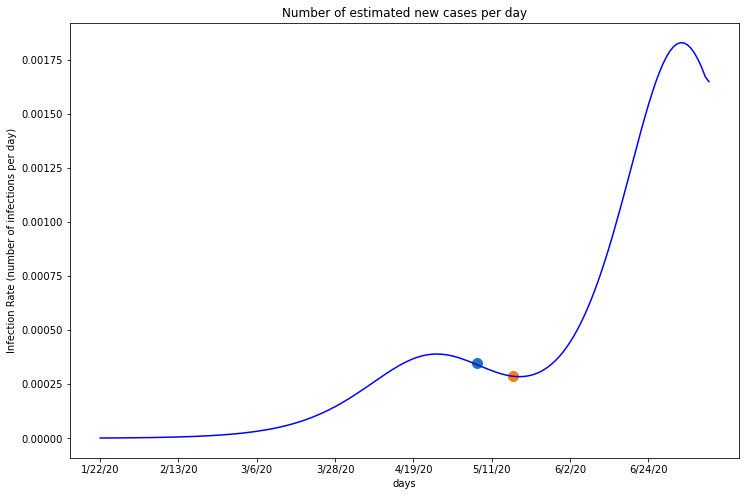

In [4]:
plt.figure(figsize=(12,8))
plt.plot(deaths_df_MR['index'], first_derivative / 2716940, color='blue', label='death rate cases')
plt.xlabel('days')
plt.ylabel('Infection Rate (number of infections per day)')
plt.title('Number of estimated new cases per day')
plt.xticks(np.arange(0, 166, step=22)) 
plt.scatter(index_val-66, 0.00035, s=100)
plt.scatter(index_val-56, 0.00029, s=100)

The first blue dot on this graph marks the date when Maricopa began reopening, starting with salons and dine-in restarants. The orange dot marks when the stay home order offically expired. The date which Maricopa lifted their stay at home order seems to be the most compelling, as it lies on graph where the infection rate begins increasing again. This suggests Maricopa's policy changes directly caused a new spike in their county's infections.

In [5]:
deaths_df_MD = deaths_df.iloc[362,:]
deaths_df_MD = deaths_df_MD.reset_index()

index_val = len(deaths_df_MD.index)

calculate_infection(deaths_df_MD, index_val)
deaths_df_MD = deaths_df_MD[0:-18]

index_val = len(deaths_df_MD.index)

In [6]:
def logistic(x, midpoint=0, rate=.8, maximum=1):
    return maximum / (1 + np.exp(-rate * (x - midpoint)))

x = np.linspace(-6, 10, 1000)
y = logistic(x)# + logistic(x, midpoint=6, rate=2, maximum=5)



def double_log(x, x1, r1, m1, x2, r2, m2):
    return logistic(x, x1, r1, m1) + logistic(x, x2, r2, m2)


popt1, _ = curve_fit(logistic, range(0, index_val),  deaths_df_MD['total_infections'], p0=[0,0,0], maxfev = 5000)

popt2, _ = curve_fit(double_log, range(0, index_val), deaths_df_MD['total_infections'], p0=[0,0,0,0,0,0])

xmodel = np.linspace(0, index_val, index_val)
ymodel1 = logistic(xmodel, *popt1)

ymodel2 = double_log(xmodel, *popt2)

first_derivative = np.gradient(ymodel2)
second_derivative = np.gradient(first_derivative)

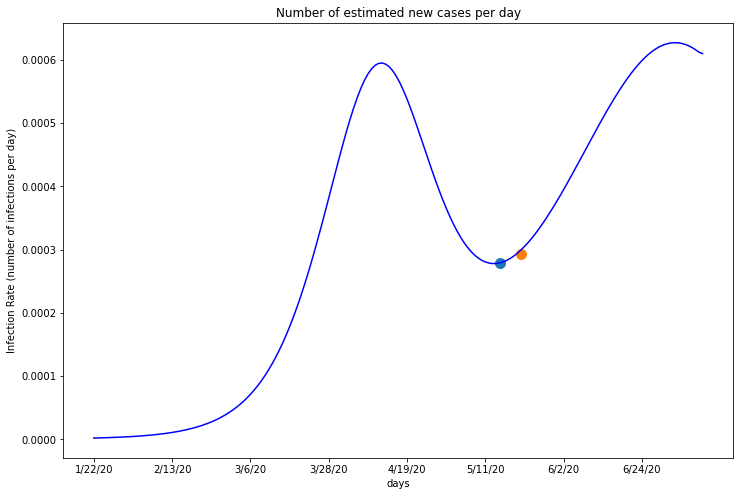

In [7]:
plt.figure(figsize=(12,8))
plt.plot(deaths_df_MD['index'], first_derivative / 2716940, color='blue', label='death rate cases')
plt.xlabel('days')
plt.ylabel('Infection Rate (number of infections per day)')
plt.title('Number of estimated new cases per day')
plt.xticks(np.arange(0, 166, step=22)) 
plt.scatter(index_val-58, 0.000279, s=100)
plt.scatter(index_val-52, 0.000293, s=100)

The first blue dot on this graph marks the date when Miami-Dade began reopening, beggining with their three marina facilities on May 14th. The orange dot marks when all essential and non essential businesses were allowed to reopen to customers. In this case, Miami-Dade's reopening data appears to be the catalyst in their recent infection spike. Like Maricopa's orange dot, the blue marker lies at the point on the graph where the infection rate begins rising again, suggesting that it directly caused the spike. 